<a href="https://colab.research.google.com/github/benitoredin0/BootCamp-2/blob/main/simpsons_grupo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os

In [3]:
# Nombre del archivo
archivo1 = 'simpsons_characters.csv'
df1 = pd.read_csv(archivo1)

archivo2 = 'simpsons_episodes.csv'
df2 = pd.read_csv(archivo2)

archivo3 = 'simpsons_locations.csv'
df3 = pd.read_csv(archivo3)

archivo4 = 'simpsons_script_lines.csv'
df4 = pd.read_csv(archivo4)


In [60]:
df1.head() #personajes
#df2.head() #episodios
#df3.head() #locations
#df4.head() #scripts

,id,name
0,7,children
1,12,mechanical santa
2,13,tattoo man
3,16,doctor zitsofsky
4,20,students


In [61]:
# Cantidad de nulos por columnas
df1.isnull().sum(axis = 0)
#df2.isnull().sum(axis = 0)
#df3.isnull().sum(axis = 0)
#df4.isnull().sum(axis = 0)

id      0
name    0
dtype: int64

In [5]:
def get_na(df):
    qsna = df.shape[0] - df.isnull().sum(axis = 0) #Cantidad de NA
    qna = df.isnull().sum(axis = 0)
    ppna = round(100*(qna/df.shape[0]),2)
    aux = {'Datos sin Nas en qtd': qsna, 'Na en qtd': qna, 'Na en %': ppna}
    na = pd.DataFrame(data = aux)
    return na.sort_values(by = 'Na en qtd', ascending = False)

In [6]:
get_na(df4)

,Datos sin Nas en qtd,Na en qtd,Na en %
normalized_text,4043,602,12.96
word_count,4043,602,12.96
spoken_words,4044,601,12.94
character_id,4132,513,11.04
raw_character_text,4132,513,11.04
location_id,4643,2,0.04
raw_location_text,4643,2,0.04
id,4645,0,0.00
episode_id,4645,0,0.00
number,4645,0,0.00


In [8]:
df1.shape

(6722, 4)

In [9]:
filtro = df4[df4['speaking_line']==False]
print(filtro)

         id  episode_id  number  \
8      9557          32     217   
16     9565          32     225   
27     9576          32     236   
29    75766         263     106   
35     9583          32     243   
...     ...         ...     ...   
4615  14172          47     166   
4619  14176          47     170   
4626  14183          47     177   
4633  14190          47     184   
4635  14192          47     186   

                                               raw_text  timestamp_in_ms  \
8     (Apartment Building: Ext. apartment building -...           889000   
16    (Springfield Elementary School: EXT. ELEMENTAR...           918000   
27                     Bart Simpson: (ANGUISHED SCREAM)           936000   
29                 (Moe's Tavern: Int. Moe's - evening)           497000   
35      (Train Station: int. train station - afternoon)           960000   
...                                                 ...              ...   
4615        (Darkened Room: INT. DARKENED ROOM 

In [10]:
df1 = df1.drop(columns='gender', axis=1)
df1.head(3)

df1 = df1.drop(columns='name', axis=1)
df1 = df1.rename(columns={'normalized_name':'name'})
df1.head(3)

df4 = df4.drop(columns='normalized_text', axis=1)


In [11]:
df4.head(5)

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",31.0
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9.0,3.0,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,3.0
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464.0,3.0,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,22.0
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9.0,3.0,Lisa Simpson,Springfield Elementary School,That life is worth living.,5.0
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40.0,3.0,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,33.0


In [12]:
df4 = df4.dropna()


In [13]:

df4['character_id'] = df4['character_id'].astype(int)
df4['location_id'] = df4['location_id'].astype(int)


In [14]:
df4.head(5)

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,word_count
0,9549,32,209,"Miss Hoover: No, actually, it was a little of ...",848000,True,464,3,Miss Hoover,Springfield Elementary School,"No, actually, it was a little of both. Sometim...",31.0
1,9550,32,210,Lisa Simpson: (NEAR TEARS) Where's Mr. Bergstrom?,856000,True,9,3,Lisa Simpson,Springfield Elementary School,Where's Mr. Bergstrom?,3.0
2,9551,32,211,Miss Hoover: I don't know. Although I'd sure l...,856000,True,464,3,Miss Hoover,Springfield Elementary School,I don't know. Although I'd sure like to talk t...,22.0
3,9552,32,212,Lisa Simpson: That life is worth living.,864000,True,9,3,Lisa Simpson,Springfield Elementary School,That life is worth living.,5.0
4,9553,32,213,Edna Krabappel-Flanders: The polls will be ope...,864000,True,40,3,Edna Krabappel-Flanders,Springfield Elementary School,The polls will be open from now until the end ...,33.0


In [15]:

df4['spoken_words'] = df4['spoken_words'].str.lower()
df4['raw_text'] = df4['raw_text'].str.lower()


In [16]:
df4.isnull().sum(axis = 0)

id                    0
episode_id            0
number                0
raw_text              0
timestamp_in_ms       0
speaking_line         0
character_id          0
location_id           0
raw_character_text    0
raw_location_text     0
spoken_words          0
word_count            0
dtype: int64

In [17]:
get_na(df4)

,Datos sin Nas en qtd,Na en qtd,Na en %
id,4041,0,0.0
episode_id,4041,0,0.0
number,4041,0,0.0
raw_text,4041,0,0.0
timestamp_in_ms,4041,0,0.0
speaking_line,4041,0,0.0
character_id,4041,0,0.0
location_id,4041,0,0.0
raw_character_text,4041,0,0.0
raw_location_text,4041,0,0.0


In [18]:
#Si no tiene Video no sirve
df2 = df2[pd.notnull(df2['video_url'])]


In [19]:
df2.isnull().sum(axis = 0)

id                        0
image_url                 0
imdb_rating               0
imdb_votes                0
number_in_season          0
number_in_series          0
original_air_date         0
original_air_year         0
production_code           0
season                    0
title                     0
us_viewers_in_millions    3
video_url                 0
views                     0
dtype: int64

In [20]:
df2.dropna()

,id,image_url,imdb_rating,imdb_votes,number_in_season,number_in_series,original_air_date,original_air_year,production_code,season,title,us_viewers_in_millions,video_url,views
0,10,http://static-media.fxx.com/img/FX_Networks_-_...,7.4,1511.0,10,10,1990-03-25,1990,7G10,1,Homer's Night Out,30.30,http://www.simpsonsworld.com/video/275197507879,50816.0
1,12,http://static-media.fxx.com/img/FX_Networks_-_...,8.3,1716.0,12,12,1990-04-29,1990,7G12,1,Krusty Gets Busted,30.40,http://www.simpsonsworld.com/video/288019523914,62561.0
2,14,http://static-media.fxx.com/img/FX_Networks_-_...,8.2,1638.0,1,14,1990-10-11,1990,7F03,2,"Bart Gets an ""F""",33.60,http://www.simpsonsworld.com/video/260539459671,59575.0
3,17,http://static-media.fxx.com/img/FX_Networks_-_...,8.1,1457.0,4,17,1990-11-01,1990,7F01,2,Two Cars in Every Garage and Three Eyes on Eve...,26.10,http://www.simpsonsworld.com/video/260537411822,64959.0
4,19,http://static-media.fxx.com/img/FX_Networks_-_...,8.0,1366.0,6,19,1990-11-15,1990,7F08,2,Dead Putting Society,25.40,http://www.simpsonsworld.com/video/260539459670,50691.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,500,http://static-media.fxx.com/img/FX_Networks_-_...,7.0,580.0,14,500,2012-02-19,2012,PABF07,23,At Long Last Leave,5.77,http://www.simpsonsworld.com/video/230541891832,45226.0
596,502,http://static-media.fxx.com/img/FX_Networks_-_...,7.3,541.0,16,502,2012-03-11,2012,PABF08,23,How I Wet Your Mother,4.97,http://www.simpsonsworld.com/video/230597187582,44818.0
597,511,http://static-media.fxx.com/img/FX_Networks_-_...,6.9,460.0,3,511,2012-11-04,2012,PABF18,24,Adventures in Baby-Getting,5.65,http://www.simpsonsworld.com/video/221688899646,39687.0
598,542,http://static-media.fxx.com/img/FX_Networks_-_...,6.4,473.0,12,542,2014-03-09,2014,SABF08,25,Diggs,2.69,http://www.simpsonsworld.com/video/310529091639,39292.0


In [21]:
df2 = df2.dropna(subset=['us_viewers_in_millions'])


In [22]:
df2.isnull().sum(axis = 0) #0 nulos

id                        0
image_url                 0
imdb_rating               0
imdb_votes                0
number_in_season          0
number_in_series          0
original_air_date         0
original_air_year         0
production_code           0
season                    0
title                     0
us_viewers_in_millions    0
video_url                 0
views                     0
dtype: int64

In [23]:
df2[df2['us_viewers_in_millions'].isnull()].sum(axis = 0) #tiene nulos

id                          0
image_url                   0
imdb_rating               0.0
imdb_votes                0.0
number_in_season            0
number_in_series            0
original_air_date           0
original_air_year           0
production_code             0
season                      0
title                       0
us_viewers_in_millions    0.0
video_url                   0
views                     0.0
dtype: object

In [58]:
get_na(df1)

,Datos sin Nas en qtd,Na en qtd,Na en %
id,6722,0,0.0
name,6722,0,0.0


In [28]:
df_con_nulos = df4[df4.isnull().any(axis=1)]
df_con_nulos.head(6)

,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,word_count


In [29]:
df4.isnull().sum(axis = 0) #tiene nulos

id                    0
episode_id            0
number                0
raw_text              0
timestamp_in_ms       0
speaking_line         0
character_id          0
location_id           0
raw_character_text    0
raw_location_text     0
spoken_words          0
word_count            0
dtype: int64

In [30]:
df4 = df4.dropna(subset=['timestamp_in_ms'])

In [32]:
df4 = df4[df4['timestamp_in_ms'] != 0]

In [35]:
df4.sort_values(by=['timestamp_in_ms'], ascending=True).head(4)


,id,episode_id,number,raw_text,timestamp_in_ms,speaking_line,character_id,location_id,raw_character_text,raw_location_text,spoken_words,word_count
3851,13407,45,1,"kent brockman: hello, i'm kent brockman and th...",34000,True,211,510,Kent Brockman,Wooded Area,"hello, i'm kent brockman and this is eye on sp...",10.0
2321,11857,40,1,homer simpson: here's good news. according to ...,34000,True,2,5,Homer Simpson,Simpson Home,here's good news. according to this eye-catchi...,16.0
2615,12150,41,1,krusty the clown: i hold in my hand the final ...,34000,True,139,462,Krusty the Clown,KRUSTY THE CLOWN SHOW,i hold in my hand the final axe.,8.0
4451,14007,47,1,"marge simpson: ""barnacle bill's home pregnancy...",45000,True,1,5,Marge Simpson,Simpson Home,"""barnacle bill's home pregnancy test""? homer, ...",14.0


In [36]:
df4['timestamp_in_ms'] = df4['timestamp_in_ms'].astype(int)


In [38]:
df4['speaking_line'] = df4['speaking_line'].astype('bool')


In [39]:
df4.dtypes


id                      int64
episode_id              int64
number                  int64
raw_text               object
timestamp_in_ms         int64
speaking_line            bool
character_id            int64
location_id             int64
raw_character_text     object
raw_location_text      object
spoken_words           object
word_count            float64
dtype: object

In [54]:
def clean(df):
    df.duplicated().sum()
    df.drop_duplicates(inplace=True)
    print(df.isnull().sum())

clean(df1)



id      0
name    0
dtype: int64


In [55]:
def clean(df):
    df.duplicated().sum()
    df.drop_duplicates(inplace=True)
    print(df.isnull().sum())

clean(df2)


id                        0
image_url                 0
imdb_rating               0
imdb_votes                0
number_in_season          0
number_in_series          0
original_air_date         0
original_air_year         0
production_code           0
season                    0
title                     0
us_viewers_in_millions    0
video_url                 0
views                     0
dtype: int64


In [56]:
def clean(df):
    df.duplicated().sum()
    df.drop_duplicates(inplace=True)
    print(df.isnull().sum())

clean(df3)


id                 0
name               0
normalized_name    0
dtype: int64


In [57]:
def clean(df):
    df.duplicated().sum()
    df.drop_duplicates(inplace=True)
    print(df.isnull().sum())

clean(df4)


id                    0
episode_id            0
number                0
raw_text              0
timestamp_in_ms       0
speaking_line         0
character_id          0
location_id           0
raw_character_text    0
raw_location_text     0
spoken_words          0
word_count            0
dtype: int64


In [40]:
df1.to_parquet('characters.parquet')
df2.to_parquet('episodes.parquet')
df3.to_parquet('locations.parquet')
df4.to_parquet('scripts.parquet')

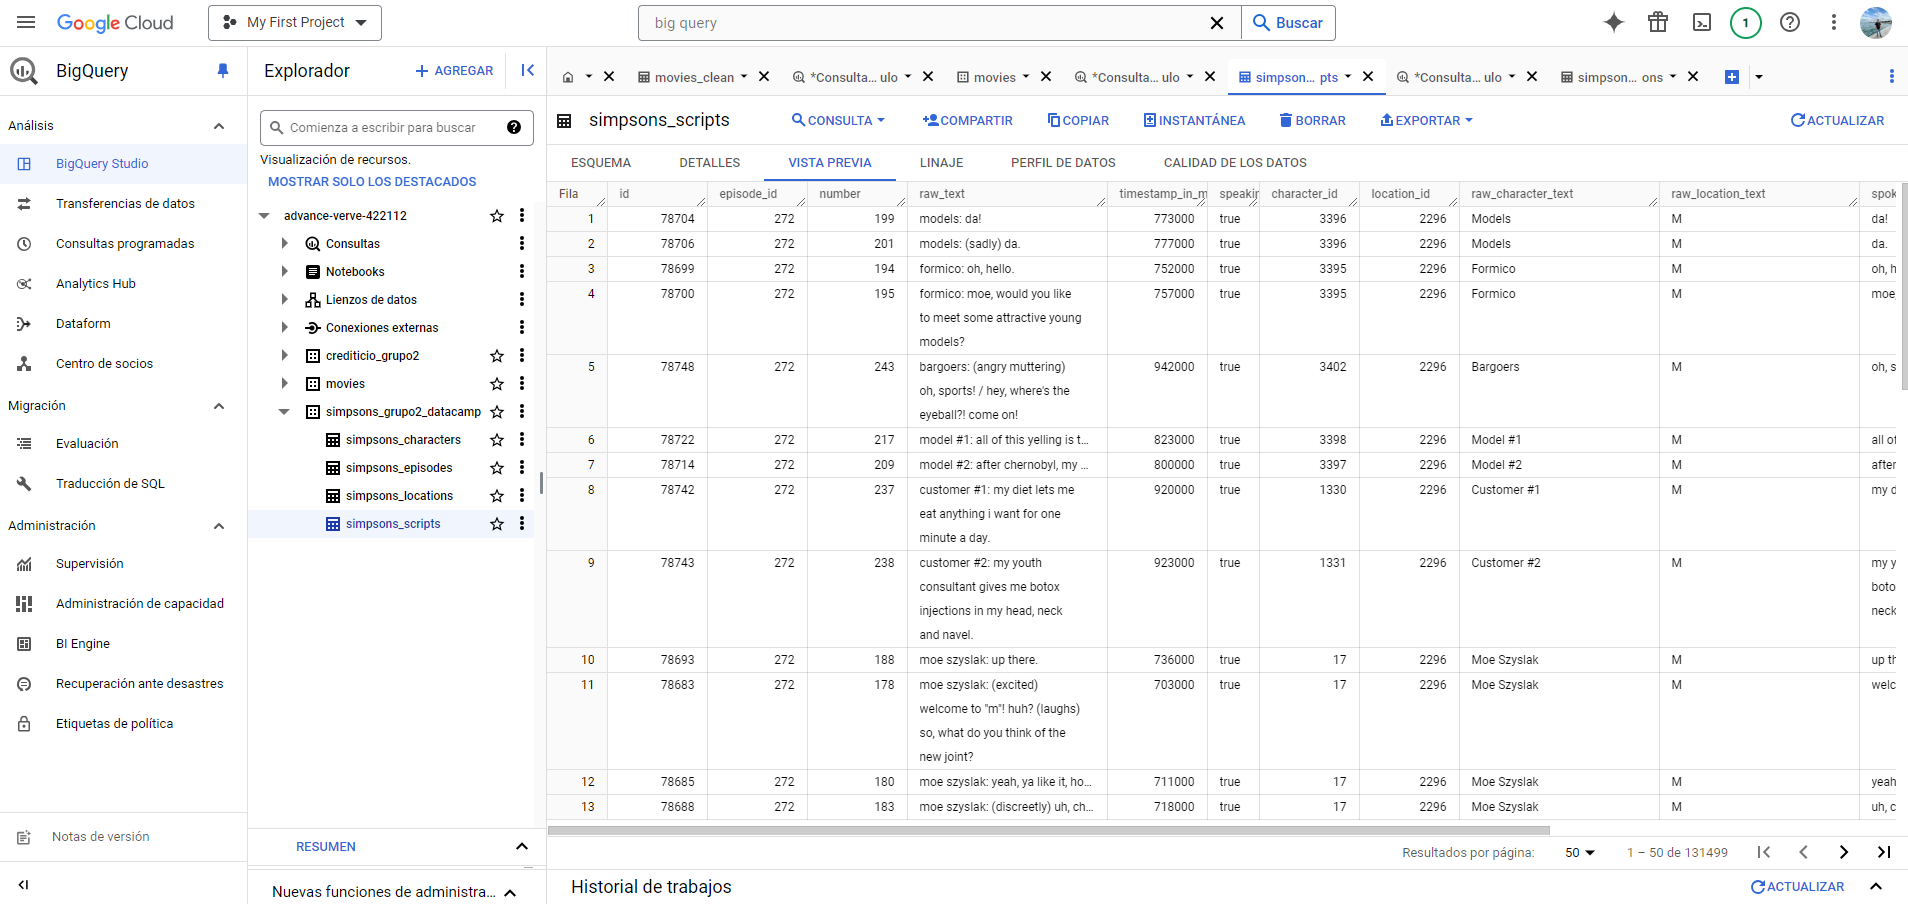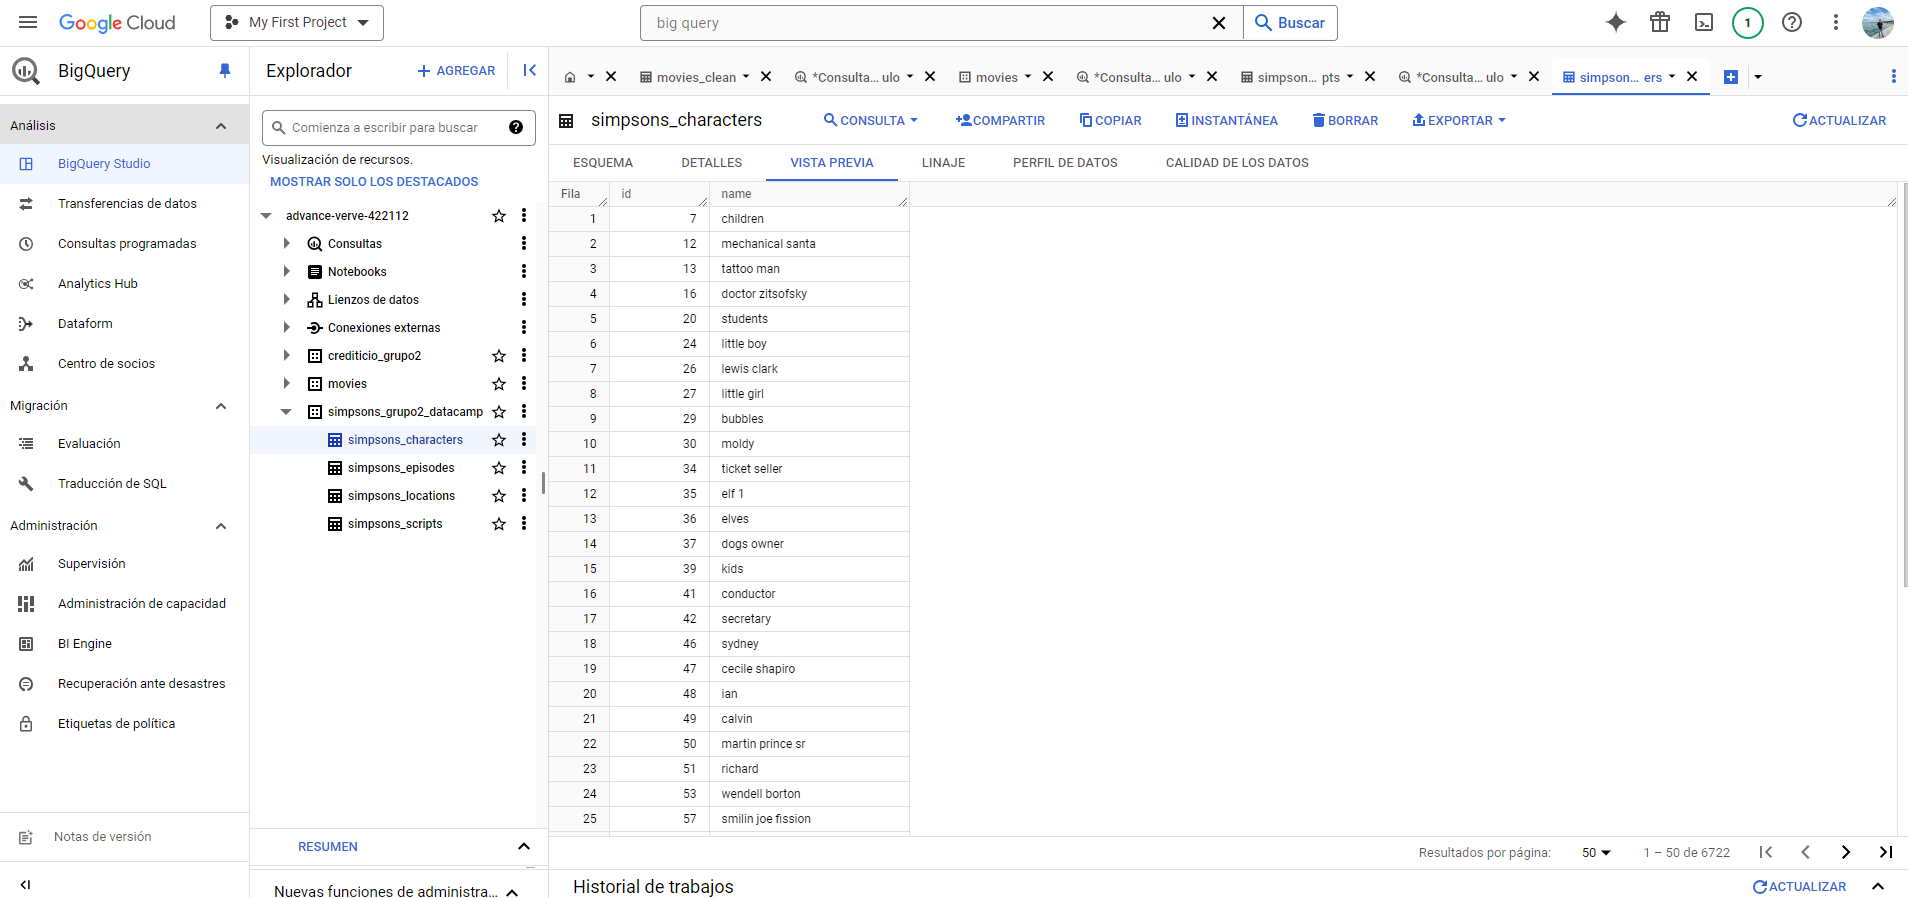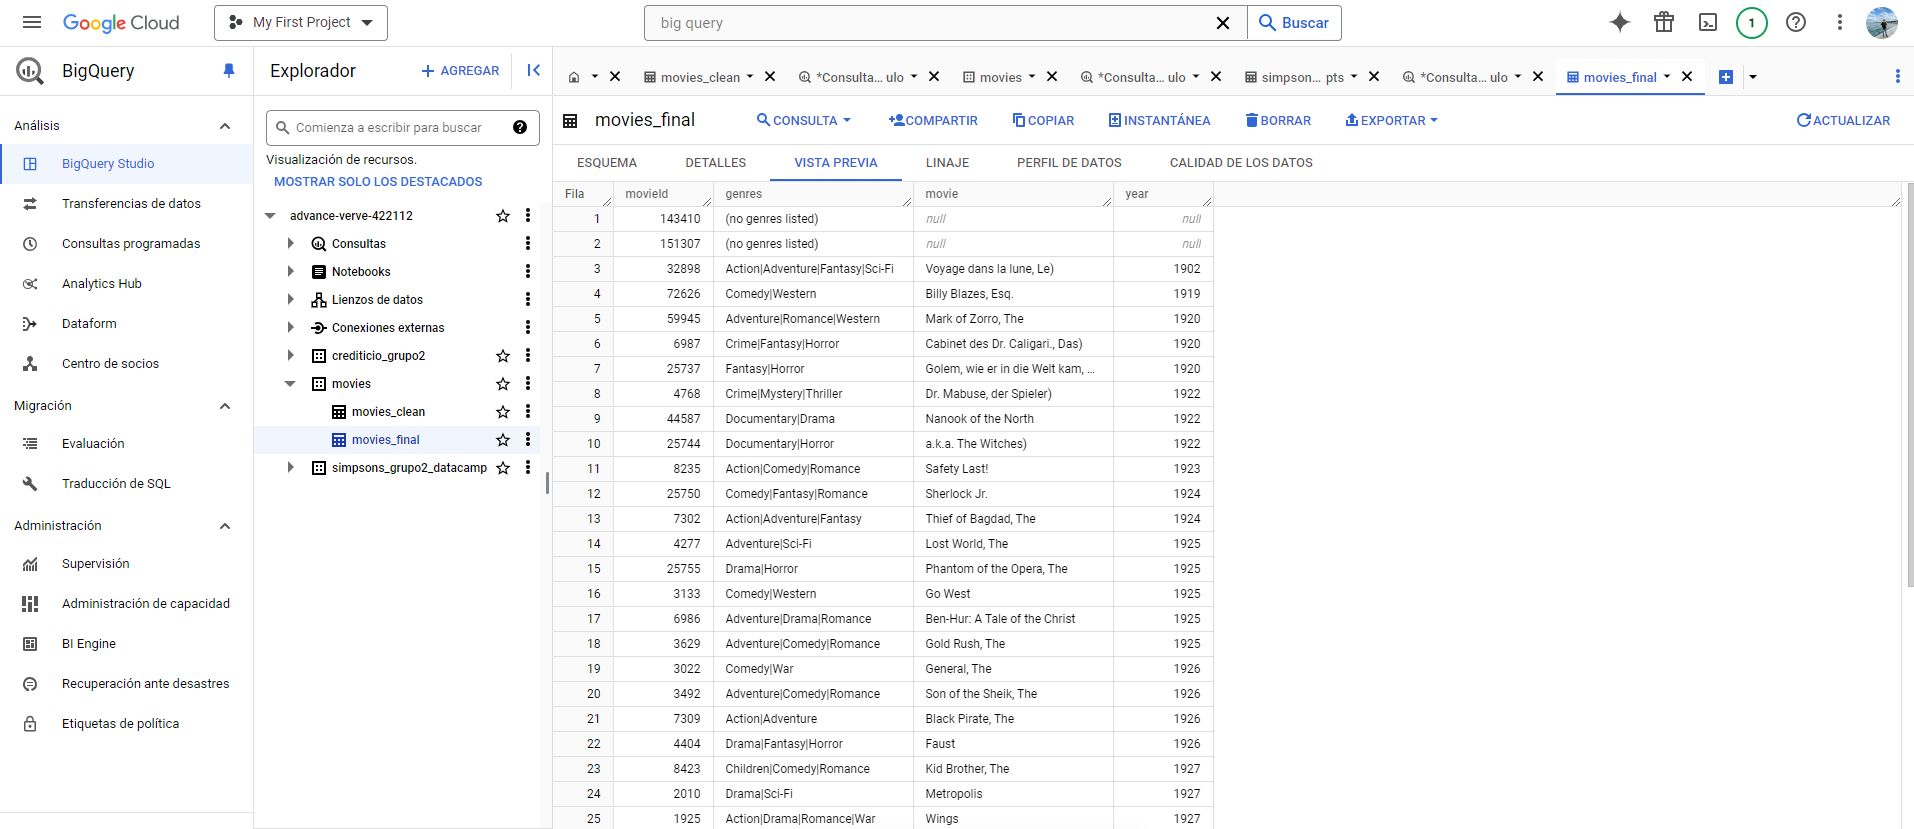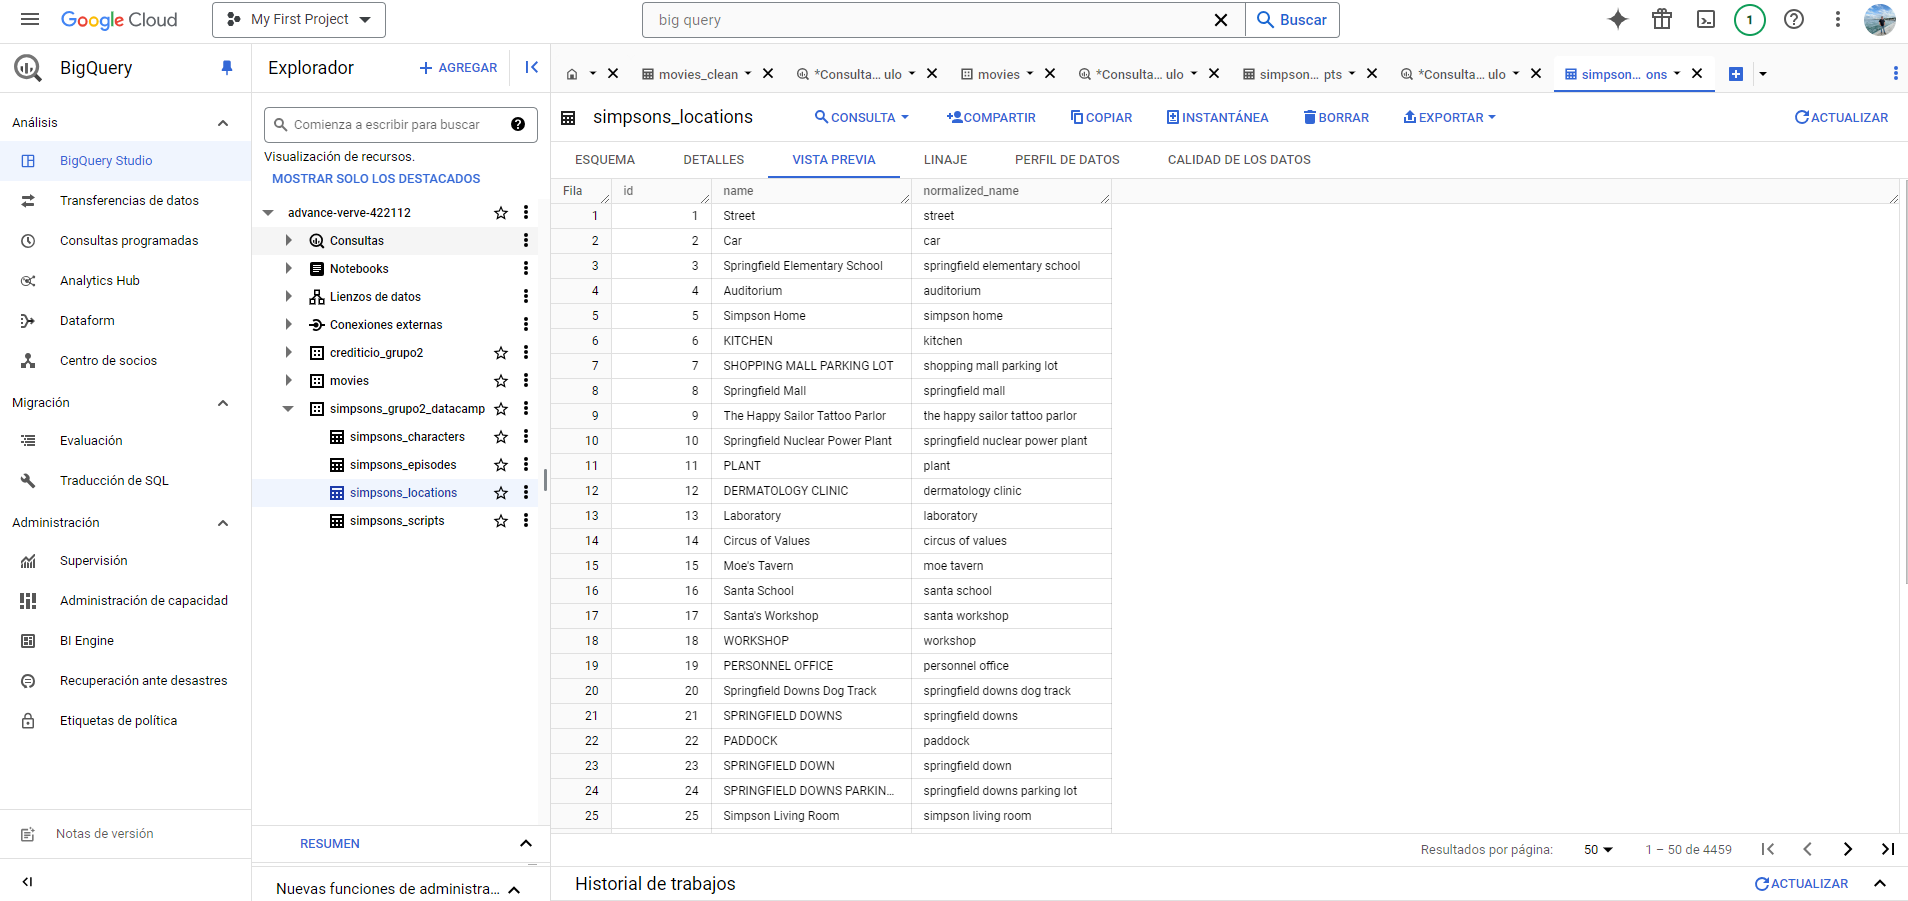